### 1. Loading MNIST data in Keras

In [1]:
from keras.datasets import mnist

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

There are 60000 gray scale images of resolution 28x28 in training set

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

There are 10000 gray scale images of resolution 28x28 in test set

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### 2. Network Architecture

In [10]:
from keras import models
from keras import layers

In [11]:
network = models.Sequential()

# Hidden layer 1 with 512 units
network.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, )))

# Output softmax layer with 10 units for 10 classes
network.add(layers.Dense(10, activation = 'softmax'))

### 3. Compilation step
Three things to remember:
* Optimizer
* Loss function
* Metric

In [12]:
network.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


### 4. Preparing the image data
Here, we flatten the image matrix and normailze the values

In [13]:
train_img = train_images.reshape((60000, 28 * 28))
train_img = train_img.astype('float32') / 255

test_img = test_images.reshape((10000, 28 * 28))
test_img = test_img.astype('float32') / 255

### 5. Preparing the labels
Labels must be categorically encoded (one-hot encoded) because for every test point the actual output must be a vector of size 10 as expected by the softmax layer.

In [15]:
from keras.utils import to_categorical

In [16]:
train_cls = to_categorical(train_labels)
test_cls = to_categorical(test_labels)

### 6. Fit the network to training data

In [20]:
network.fit(train_img, train_cls, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 11s 181us/step - loss: 0.2599 - acc: 0.9248
Epoch 2/5
60000/60000 [==============================] - 11s 177us/step - loss: 0.1030 - acc: 0.9697
Epoch 3/5
60000/60000 [==============================] - 11s 177us/step - loss: 0.0685 - acc: 0.9795
Epoch 4/5
60000/60000 [==============================] - 11s 176us/step - loss: 0.0499 - acc: 0.9850
Epoch 5/5
60000/60000 [==============================] - 11s 176us/step - loss: 0.0366 - acc: 0.9892


Train accuracy = 98.92%

### 7. Evauating with test set

In [21]:
test_loss, test_acc = network.evaluate(test_img, test_cls)
print('\nTest accuracy:', test_acc*100)

10000/10000 [==============================] - 1s 144us/step

Test accuracy: 97.88


### 8. Visualizing the incorrectly predicted images

In [22]:
y_pred = network.predict_classes(test_img)

In [24]:
y_pred[5]

1

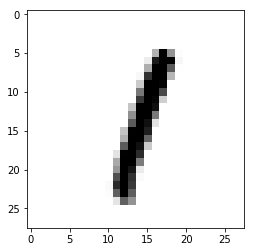

In [25]:
plt.imshow(test_img[5].reshape((28,28)), cmap=plt.cm.binary) 
plt.show()

In [27]:
import numpy as np

In [28]:
# incorrects = np.nonzero(y_pred.reshape((-1,)) != test_labels)
incorrects = np.nonzero(y_pred != test_labels)

In [29]:
incorrects[0].shape

(212,)

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

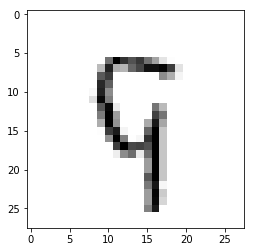

Predicted class:  5


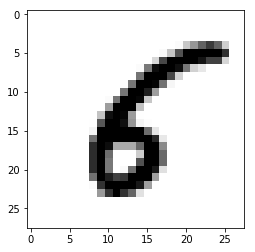

Predicted class:  5


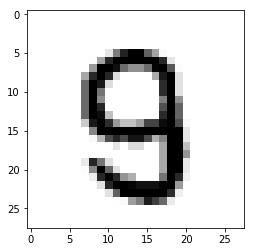

Predicted class:  8


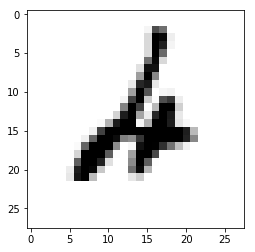

Predicted class:  2


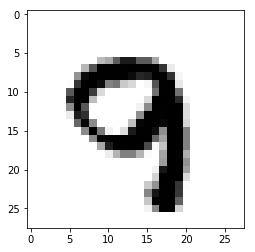

Predicted class:  3


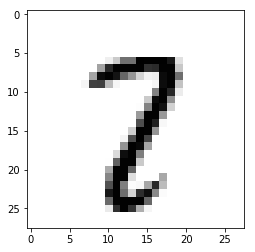

Predicted class:  7


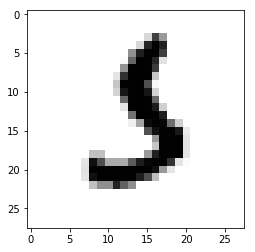

Predicted class:  3


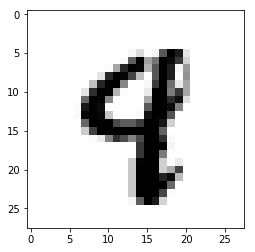

Predicted class:  8


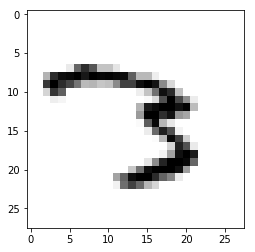

Predicted class:  7


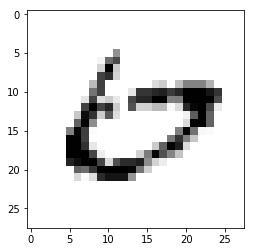

Predicted class:  0


In [31]:
# Some of the incorrect results
for i in incorrects[0][:10]:
    plt.imshow(test_img[i].reshape((28,28)), cmap=plt.cm.binary) 
    plt.show()
    print("Predicted class: ", y_pred[i])